In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds1 = xr.open_zarr("../zstores/local-replay-1deg/forecast/fv3.zarr/")
ds2 = xr.open_zarr("../zstores/replay-1deg/forecast/fv3.zarr/")


In [3]:
ds1.time.values

array(['1995-10-26T00:00:00.000000000', '1995-10-26T03:00:00.000000000',
       '1995-10-26T06:00:00.000000000', '1995-10-26T09:00:00.000000000',
       '1995-10-26T12:00:00.000000000', '1995-10-26T15:00:00.000000000'],
      dtype='datetime64[ns]')

In [4]:
ds1

<xarray.Dataset>
Dimensions:     (time: 6, pfull: 127, grid_yt: 192, grid_xt: 384)
Coordinates:
    cftime      (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    ftime       (time) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
  * grid_xt     (grid_xt) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * grid_yt     (grid_yt) float64 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * pfull       (pfull) float32 0.01278 0.02033 0.03177 ... 993.5 996.2 998.8
  * time        (time) datetime64[ns] 1995-10-26 ... 1995-10-26T15:00:00
Data variables: (12/40)
    clwmr       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    dpres       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    f10m        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    grle        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    icec        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    icmr        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    ...          ...
    ugrd10m     (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    veg         (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    vgrd        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    vgrd10m     (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    vtype       (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    weasd       (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    dtp:          720.0
    fhzero:       3
    grid:         gaussian
    grid_id:      1
    im:           384
    imp_physics:  8
    jm:           192
    landsfcmdl:   2
    ncld:         8
    nsoil:        4
    source:       FV3GFS

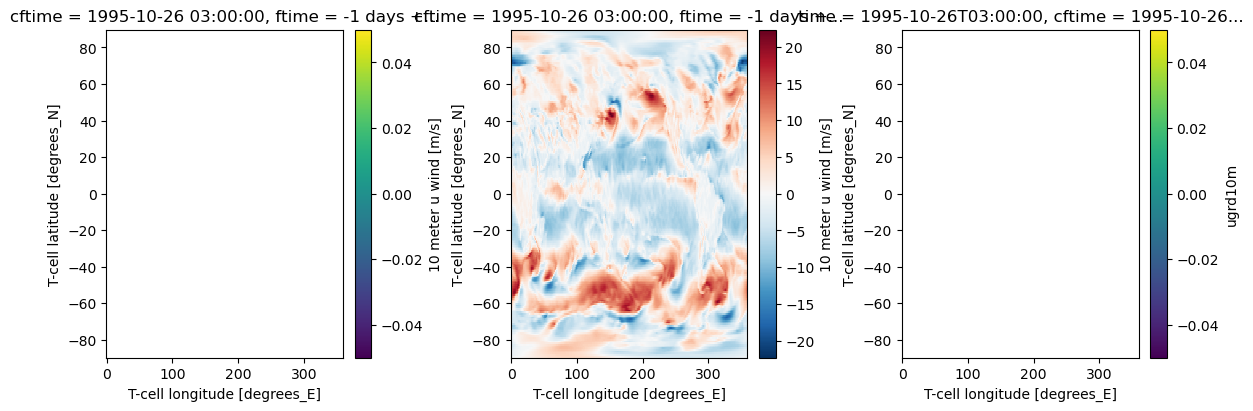

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)

for xds, ax in zip([ds1, ds2, ds2-ds1], axs):
    plotme = xds["ugrd10m"].sel(time="1995-10-26T03")
    plotme.plot(ax=ax)

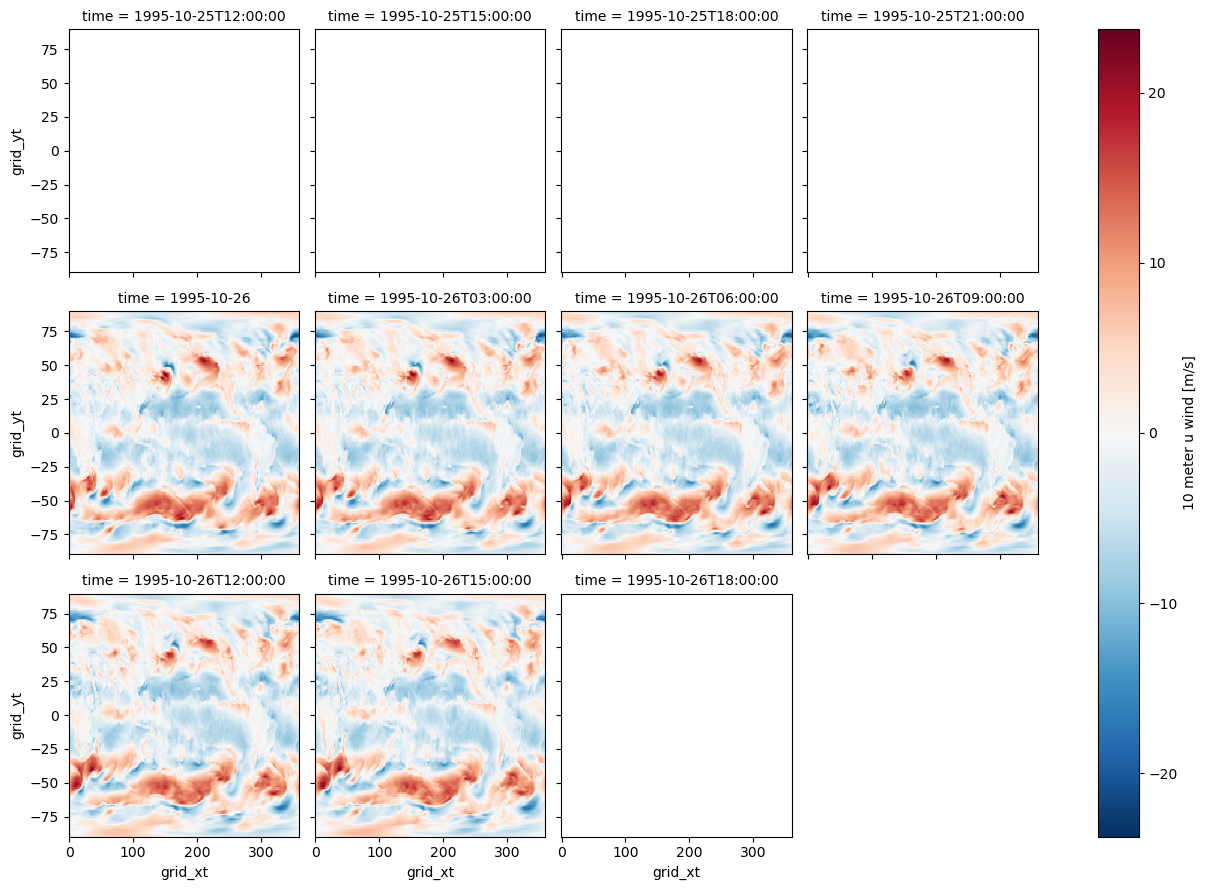

In [7]:
ds2.ugrd10m.sel(time=slice("1995-10-25T12", "1995-10-26T18")).plot(col="time", col_wrap=4)

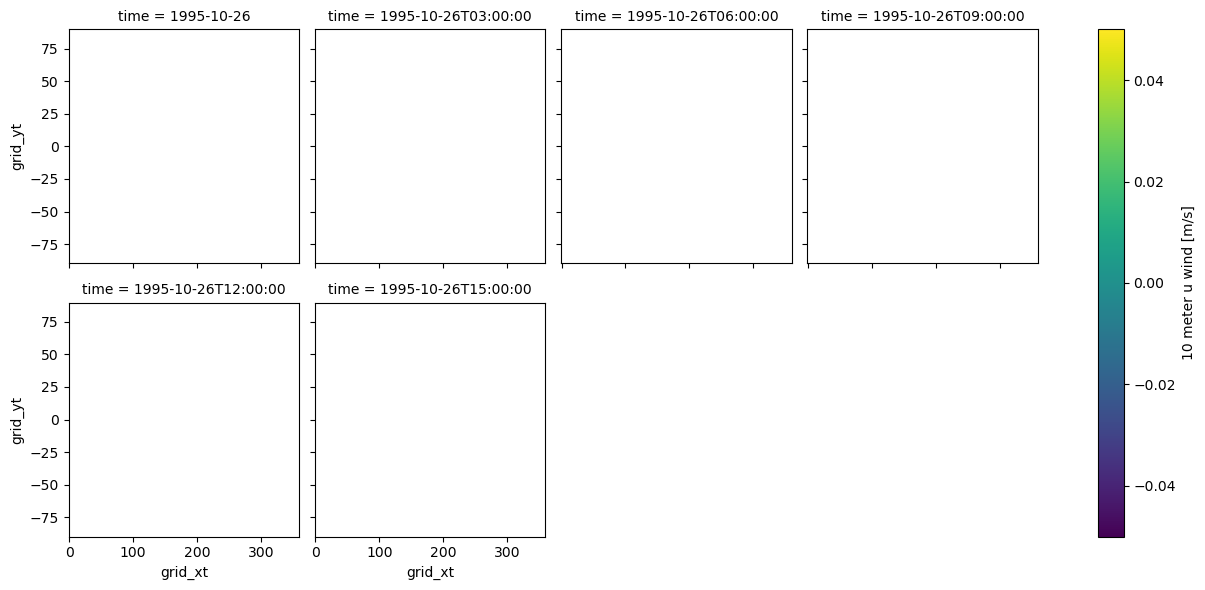

In [8]:
ds1.ugrd10m.plot(col="time", col_wrap=4)

## Pull each separately here


In [10]:
import sys
sys.path.append("../scripts")
from replay_mover import ReplayMover1Degree
from UFS2ARCO import FV3Dataset

In [12]:
mover = ReplayMover1Degree(n_jobs=3000, config_filename="../scripts/config-replay.yaml")
replay = FV3Dataset(path_in=mover.cached_path, config_filename="../scripts/config-replay.yaml")

/contrib/Tim.Smith/UFS2ARCO/src/UFS2ARCO/ufsdataset.py:115: UserWarning: FV3Dataset.__init__: Could not find 'max_mem' in ../scripts/config-replay.yaml, will not use rechunker
  warnings.warn(


In [13]:
job_id = 1000
dslist = []
for cycle in mover.my_cycles(job_id):
    date = mover.npdate2datetime(cycle)
    dslist.append(replay.open_dataset(date, **mover.ods_kwargs))

/contrib/Tim.Smith/UFS2ARCO/src/UFS2ARCO/ufsdataset.py:368: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xds["time"] = xr.DataArray(
/contrib/Tim.Smith/UFS2ARCO/src/UFS2ARCO/ufsdataset.py:371: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by co

In [16]:
ds3 = xr.concat(dslist, dim="time")

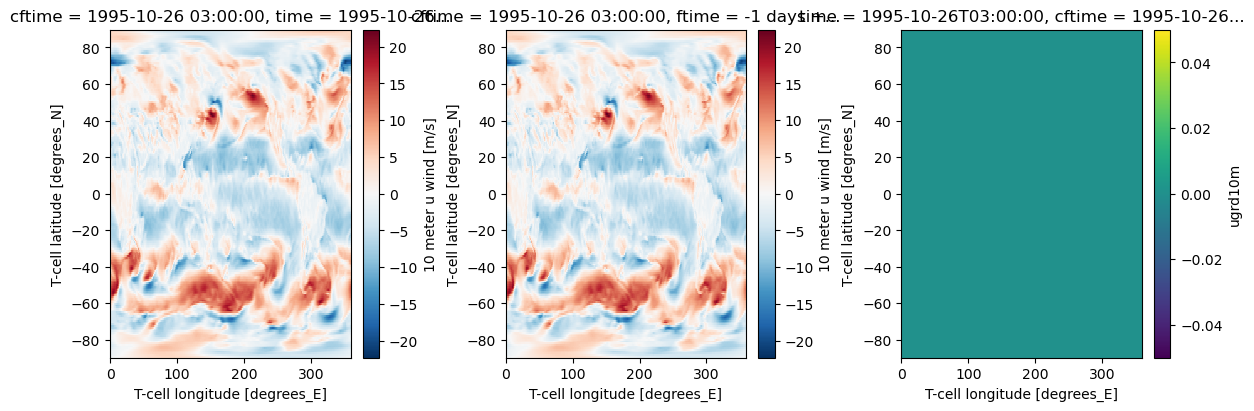

In [17]:
n_time = len(ds3.time)
fig, axs = plt.subplots(n_time, 3, figsize=(12,4*n_time), constrained_layout=True)

for time, axr in zip(
for xds, ax in zip([ds3, ds2, ds2-ds3], axs):
    plotme = xds["ugrd10m"].sel(time="1995-10-26T03")
    plotme.plot(ax=ax)

In [ ]:
kk